In [44]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [45]:
from IPython.html.widgets import interact

In [61]:
def mass_plummer(a, M, r):
    #a = a*units.kpc
    Mass = M*r**3 / (a**2 + r**2)**(3/2.)
    plt.plot(r, Mass, lw=3, alpha=0.7)
    plt.xlim(0, r)
   
def rho_plummer(a, M, r):
    rho = 3*M / (4 *np.pi * a**3) * (1 + r**2/a**2)**(-5./2.)
    plt.plot(r, rho, lw=3, alpha=0.7)
    plt.xlim(0, r)

def potential_plummer(a, M, r):
    #a = a*units.kpc
    phi =  - G*M / np.sqrt(r**2 + a**2)
    plt.plot(r, phi, lw=3, alpha=0.7)
    plt.xlim(0, r)

def vc_plummer(a, M, r):
    #a = a*units.kpc
    vc = np.sqrt(G*M*( r**2/(r**2 + a**2)**(3/2.)))
    plt.plot(r, vc, lw=3, alpha=0.7)
    #plt.ylim(0, 4)
    plt.xlim(0, r)
    #return vc

def plot_random_graph(a, M, r, generator):
    g = generator(a, M, r)
    plt.show()

In [62]:
#r = linspace(0, 25)
from astropy import constants
G = constants.G
G = G.value

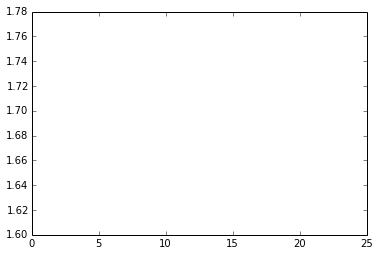

None

In [63]:
interact(plot_random_graph, a=(2,15), M=(8e11, 2e12),  r=(1, 50), p=(0.0, 1.0, 0.001),
        generator={'Mass': mass_plummer,
                   r'Density': rho_plummer,
                   r'Potential': potential_plummer,
                   u'Rotation curve': vc_plummer,
                   });